In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load dataset
data = pd.read_csv('/home/nirmala/Documents/precog_requirement_task_analysis&observations/codes/eureka2.csv')



In [2]:
data.info()
data['non_criminal_cases']=data['non_criminal_cases'].astype(int)
data=data.rename(columns={"Time_taken_to_close_case_after_taking_decision":"decision_close","time_taken_to_reach_court_after_filing":"reach_court","time_taken_to_close_case_after_filing":"close_case"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                288 non-null    int64 
 1   state               288 non-null    object
 2   dismissed_cases     288 non-null    int64 
 3   prison_cases        288 non-null    int64 
 4   withdrawal_cases    288 non-null    int64 
 5   pending_cases       288 non-null    int64 
 6   criminal_cases      288 non-null    int64 
 7   non_criminal_cases  288 non-null    int64 
 8   total_cases         288 non-null    int64 
 9   Special or not      288 non-null    object
 10  close_case          288 non-null    int64 
 11  reach_court         288 non-null    int64 
 12  decison_close       288 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 29.4+ KB


In [3]:
data['state'].replace(to_replace="Maharashtra",value='1', inplace=True)
data['state'].replace(to_replace="Andhra Pradesh",value='2' ,inplace=True)
data['state'].replace(to_replace="Karnataka",value='3' ,inplace=True)
data['state'].replace( to_replace="Kerala",value='4',inplace=True)
data['state'].replace(to_replace="Himachal Pradesh",value='5' ,inplace=True)
data['state'].replace( to_replace="Assam",value='6',inplace=True)
data['state'].replace(to_replace="Jharkhand",value='7', inplace=True)
data['state'].replace(to_replace="Bihar",value='8' ,inplace=True)
data['state'].replace(to_replace="Rajasthan",value='9' ,inplace=True)
data['state'].replace(to_replace="Tamilnadu",value='10' ,inplace=True)
data['state'].replace(to_replace="Orissa",value='11',inplace=True)
data['state'].replace(to_replace="Jammu and kashmir",value='12' ,inplace=True)
data['state'].replace(to_replace="Uttar pradesh",value='13' ,inplace=True)
data['state'].replace(to_replace="Haryana",value='14' ,inplace=True)
data['state'].replace(to_replace="Uttarakhand",value='15' ,inplace=True)
data['state'].replace(to_replace="West Bengal",value='16' ,inplace=True)
data['state'].replace(to_replace="Gujarath",value='17' ,inplace=True)
data['state'].replace(to_replace="Chattisgarh",value='18' ,inplace=True)
data['state'].replace(to_replace="Mizoram",value='19' ,inplace=True)
data['state'].replace(to_replace="Tripura",value='20' ,inplace=True)
data['state'].replace(to_replace="Meghalaya",value='21' ,inplace=True)
data['state'].replace(to_replace="Punjab",value='22' ,inplace=True)
data['state'].replace(to_replace="Madhya Pradesh",value='23' ,inplace=True)
data['state'].replace(to_replace="Sikkim",value='24' , inplace=True)
data['state'].replace(to_replace="Manipur",value='25' ,inplace=True)
data['state'].replace(to_replace="Delhi",value='26' ,inplace=True)
data['state'].replace(to_replace="Chandigarh",value='27' ,inplace=True)
data['state'].replace(to_replace="Telangana",value='29' ,inplace=True)
data['state'].replace(to_replace="Goa",value='30' ,inplace=True)
data['state'].replace(to_replace="Diu and daman",value='31' ,inplace=True)
data['state'].replace(to_replace="DNH at silvasa",value='32',inplace=True)
data['state'].replace(to_replace="Ladakh",value='33' ,inplace=True)
data['state']=data['state'].astype(int)

In [4]:
data=data.drop(columns=['close_case','reach_court','decison_close'])

In [5]:
data2=data


In [6]:
special_dummies=pd.get_dummies(data["Special or not"])

In [7]:
data=pd.concat((data,special_dummies),axis=1)

In [8]:
data=data.drop(columns=['Special or not'])
data


,year,state,dismissed_cases,prison_cases,withdrawal_cases,pending_cases,criminal_cases,non_criminal_cases,total_cases,Not Special,Special
0,2010,2,27690,0,1332,200,73357,30467,119359,0,1
1,2011,2,35976,0,1802,5710,94262,46710,158237,0,1
2,2012,2,40361,0,2068,838,97487,52130,180811,0,1
3,2013,2,36882,0,2653,1004,111718,71926,195473,0,1
4,2014,2,11372,0,679,2106,149739,90652,246828,0,1
...,...,...,...,...,...,...,...,...,...,...,...
283,2014,16,10629,0,507,7970,109395,64233,254380,0,1
284,2015,16,20955,19,2560,6027,225335,146027,381017,0,1
285,2016,16,0,189,0,3207,186727,157430,353949,0,1
286,2017,16,1,3652,0,0,212715,196775,444120,1,0


In [9]:


# select features and target variable
X = data.values
y = data['Special'].values


# Logistic Regression

In [10]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# train the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the classifier's performance
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(acc))


Accuracy: 0.98


/home/nirmala/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Build Decision Tree Classifier

In [11]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
dt_clf.score(X_train,y_train)
y_pred=dt_clf.predict(X_test)
dt_clf.score(X_test,y_test)

1.0

In [12]:
y_pred=dt_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[46,  0],
       [ 0, 41]])

# Build Random Forest Classifier

In [13]:
from sklearn import ensemble
rf_clf=ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

1.0

# Build Gradient Boosting Classifier

In [25]:
gb_clf=ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test,y_test)

1.0

# Tune the GB classifier

In [15]:
gb_clf=ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test,y_test)

1.0

# Build a Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test,y_test)

0.6436781609195402

# Build a LogisticRegression classifier

In [17]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

/home/nirmala/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9770114942528736

# Build a K-Nearest Neighbour Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.8160919540229885

# Build a SVM Classifier

In [19]:
from sklearn.svm import SVC
sv_clf=SVC(probability=True,kernel='linear')
sv_clf.fit(X_test,y_test)
sv_clf.score(X_test,y_test)

1.0

# Prediction Probabilities

In [20]:
r_probs=[0 for _ in range(len(y_test))]
rf_probs=rf_clf.predict_proba(X_test)
nb_probs=nb_clf.predict_proba(X_test)
dt_probs=dt_clf.predict_proba(X_test)
gb_probs=gb_clf.predict_proba(X_test)
knn_probs=knn_clf.predict_proba(X_test)
lr_probs=lr_clf.predict_proba(X_test)
sv_probs=sv_clf.predict_proba(X_test)

# Probabilities for positive outcomes is kept

In [21]:
rf_probs=rf_probs[:,1]
nb_probs=nb_probs[:,1]
dt_probs=dt_probs[:,1]
gb_probs=gb_probs[:,1]
knn_probs=knn_probs[:,1]
lr_probs=lr_probs[:,1]
sv_probs=sv_probs[:,1]

# Compute the AUROC values

In [22]:
from sklearn.metrics import roc_curve,roc_auc_score
r_auc=roc_auc_score(y_test,r_probs)
rf_auc=roc_auc_score(y_test,rf_probs)
nb_auc=roc_auc_score(y_test,nb_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
gb_auc=roc_auc_score(y_test,gb_probs)
knn_auc=roc_auc_score(y_test,knn_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
sv_auc=roc_auc_score(y_test,sv_probs)

# Display the AUROC scores

In [23]:
print("Random prediction: AUROC=%.3f"%(r_auc))
print("Random Forest: AUROC=%.3f"%(rf_auc))
print("Naive Bayes: AUROC=%.3f"%(nb_auc))
print("Decision tree prediction: AUROC=%.3f"%(dt_auc))
print("Gradient Boosting prediction: AUROC=%.3f"%(gb_auc))
print("KNearest prediction: AUROC=%.3f"%(knn_auc))
print("Logistic Regression: AUROC=%.3f"%(lr_auc))
print("Support Vector Machine: AUROC=%.3f"%(sv_auc))

Random prediction: AUROC=0.500
Random Forest: AUROC=1.000
Naive Bayes: AUROC=0.729
Decision tree prediction: AUROC=1.000
Gradient Boosting prediction: AUROC=1.000
KNearest prediction: AUROC=0.889
Logistic Regression: AUROC=0.969
Support Vector Machine: AUROC=1.000


# Calculate the ROC Curve

In [29]:
r_fpr,r_tpr, _ =roc_curve(y_test,r_probs)
rf_fpr,rf_tpr, _ =roc_curve(y_test,rf_probs)
nb_fpr,nb_tpr, _ =roc_curve(y_test,nb_probs)
dt_fpr,dt_tpr, _ =roc_curve(y_test,dt_probs)
gb_fpr,gb_tpr, _ =roc_curve(y_test,gb_probs)
knn_fpr,knn_tpr ,_ =roc_curve(y_test,knn_probs)
lr_fpr,lr_tpr, _ =roc_curve(y_test,lr_probs)
sv_fpr,sv_tpr, _ =roc_curve(y_test,sv_probs)

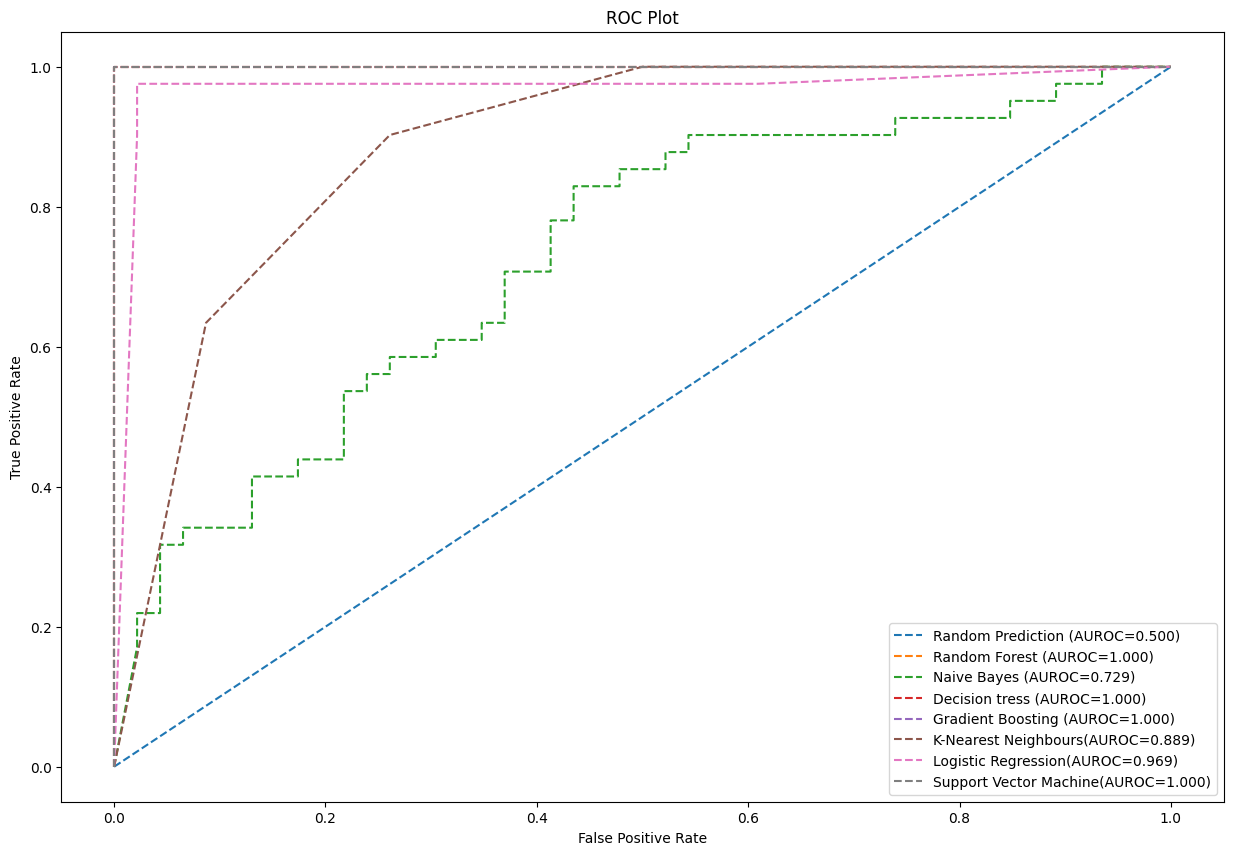

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(r_fpr,r_tpr,linestyle='--',label='Random Prediction (AUROC=%0.3F)'%r_auc)
plt.plot(rf_fpr,rf_tpr,linestyle='--',label='Random Forest (AUROC=%0.3F)'%rf_auc)
plt.plot(nb_fpr,nb_tpr,linestyle='--',label='Naive Bayes (AUROC=%0.3F)'%nb_auc)
plt.plot(dt_fpr,dt_tpr,linestyle='--',label='Decision tress (AUROC=%0.3F)'%dt_auc)
plt.plot(gb_fpr,gb_tpr,linestyle='--',label='Gradient Boosting (AUROC=%0.3F)'%gb_auc)
plt.plot(knn_fpr,knn_tpr,linestyle='--',label='K-Nearest Neighbours(AUROC=%0.3F)'%knn_auc)
plt.plot(lr_fpr,lr_tpr,linestyle='--',label='Logistic Regression(AUROC=%0.3F)'%lr_auc)
plt.plot(sv_fpr,sv_tpr,linestyle='--',label='Support Vector Machine(AUROC=%0.3F)'%sv_auc)

plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.savefig('AUROC SCORE', facecolor=(.94, .94, .94))

plt.show()


<Figure size 640x480 with 0 Axes>